## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Dataframes

In [4]:
# define a path folder
path = r'C:\Users\jeanclaude\Instacart Basket Analysis'

In [5]:
# Import orders_products_customers_updated
df_ord_prod_cust =  pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_products_customers_updated.pkl'))

# Part2
## Step 1

In [6]:
#Checking Imported Dataframe
df_ord_prod_cust.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## Step 2

Completed step. Can see in part 1 of Assignment

## Step 3

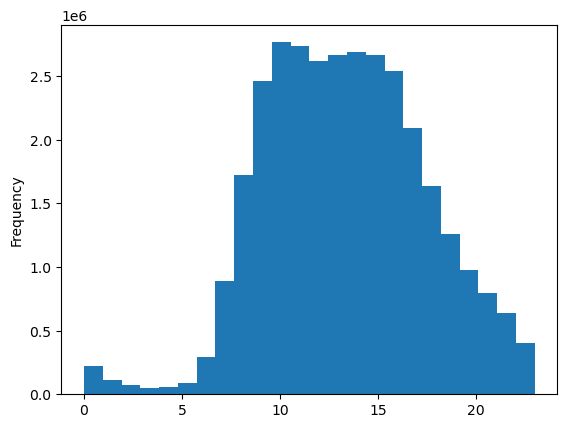

In [7]:
#Histogram for order_hour_of_day column with 24 bins because there are only 24 hours in a day
hist_3 = df_ord_prod_cust['order_hour_of_day'].plot.hist(bins = 24)

#### The Histogram demponstrates the frequency of shoppers during the 24 hour day. Between 00:00 and 06:00 it is quiter than usual, between 07:00 - 09:00 there is a gradual increase, between 10:00 - 16:00 there is a peak of shoppers, lastly between 17:00 - 24:00 there is a gradual decline in shoppers

## Step 4

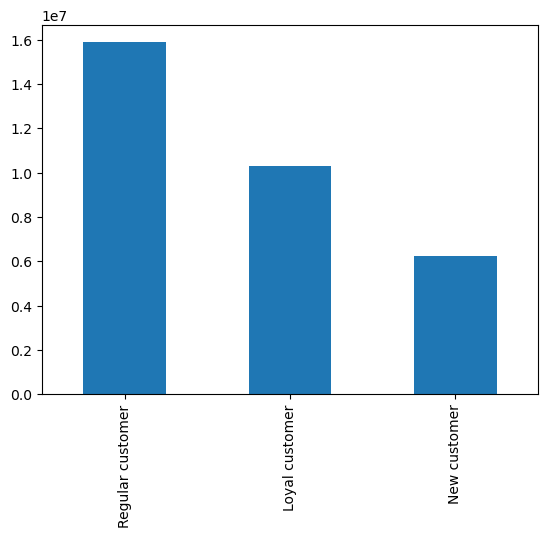

In [8]:
#Plotting bar chart to measure loyalty
bar_loyalty = df_ord_prod_cust['loyalty_flag'].value_counts().plot.bar()

## Step 5

In [9]:
#Creating a 70/30 Sampling of the dataframe as done in the exercise for part 1
np.random.seed(4)
dev = np.random.rand(len(df_ord_prod_cust)) <= 0.7

In [10]:
#List of randomized True and False values
dev

array([False,  True, False, ..., False,  True,  True])

In [11]:
#Testing the size of the array
dev.shape

(32434212,)

In [12]:
#Sample Example of the function
np.random.rand(10)

array([0.16891835, 0.04368635, 0.41602642, 0.88973306, 0.66299301,
       0.78345326, 0.02169353, 0.79078115, 0.45980038, 0.17173956])

In [13]:
#Store the dataframe into two samples, 70% in the big and 30% in the small
big = df_ord_prod_cust[dev]
small = df_ord_prod_cust[~dev]

In [14]:
#Length of the sum of the two sample spaces to check if split worked
len(big) + len(small)

32434212

In [15]:
# Assigning the small dataframe and giving it a name
df_ord_prod_cust_small = small[['order_hour_of_day','prices']]

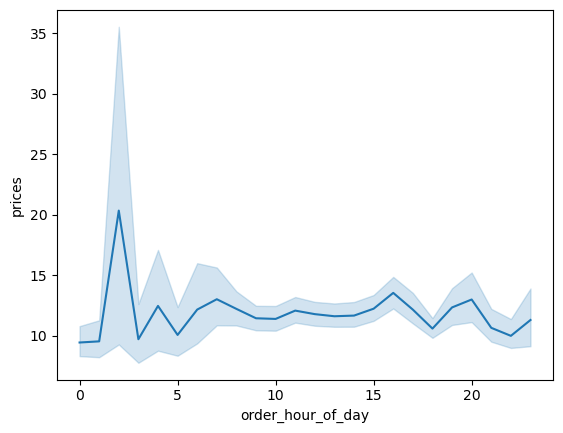

In [20]:
# making a line plot with the small df (df_ord_prod_cust_small)
line_price_per_hour = sns.lineplot(data = df_ord_prod_cust_small, x = 'order_hour_of_day',y = 'prices')

#### There is not much of a relation regarding which hour of the day it is when expenditure is higher except possibly hours 9-10 wherethere is a small dip which seems irrelevant

## Step 6

In [25]:
#Line Chart to determine if there's a connection between age and number of dependants
age_to_number_of_dependants_line = small[['Age', 'n_dependants']]

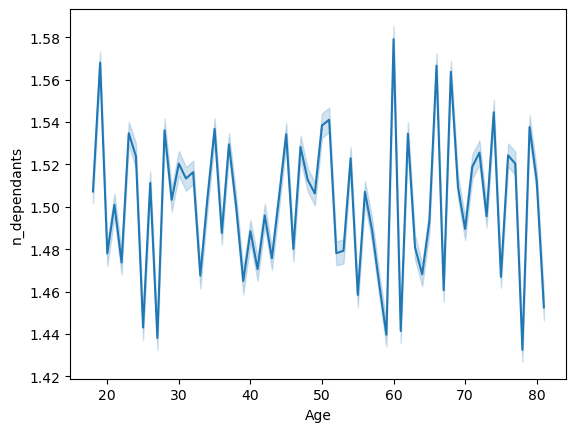

In [26]:
#Creating the line chart
line_3 = sns.lineplot(data = age_to_number_of_dependants_line, x = 'Age', y = 'n_dependants')

### There does not seem to be any connection between age and number of dependants

## Step 7

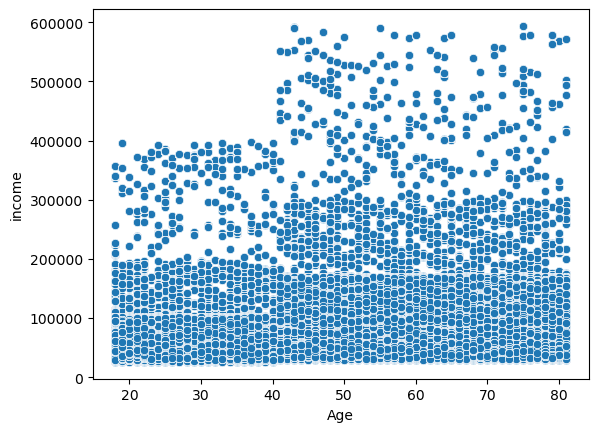

In [28]:
# scatterplot of age and income
scatter_age_income = sns.scatterplot(x = 'Age', y = 'income',data = small)

#### From the scatterplot it is clear to see that from the ages above 40 the incomes are higher

## Step 8

#### Exporting all viualizations

In [29]:
hist_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hour_of_day.png'),bbox_inches='tight')

In [30]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'),bbox_inches='tight')

In [31]:
line_price_per_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_per_hour.png'),bbox_inches='tight')

In [32]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'num_of_dependants_age.png'),bbox_inches='tight')

In [33]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_to_income.png'),bbox_inches='tight')

## Step 9

In [29]:
# Save file